# Mouse hindbrain (GABA, Glial)

In [1]:
import math
import scanpy as sc
import scvelo as scv
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
from tivelo.main import tivelo
from baseline import run_baseline

(Running UniTVelo 0.2.5.2)
2025-04-05 05:02:09


2025-04-05 13:02:09.306964: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Run TIVelo
Load the dataset. Set the data name with key for cluster, key for embedding and cluster edges (for comparison).

In [2]:
data_name = "hindbrain2"
data_path = "/lustre/project/Stat/s1155184322/datasets/velocity/Hindbrain_GABA_Glio_processed.h5ad"
adata = sc.read(data_path)

group_key = "Celltype"
emb_key = "X_tsne"
cluster_edges = [('Neural stem cells', 'Proliferating VZ progenitors'), ('Proliferating VZ progenitors', 'VZ progenitors'), 
                 ('VZ progenitors', 'Differentiating GABA interneurons'), ('VZ progenitors', 'Gliogenic progenitors'), 
                 ('Differentiating GABA interneurons', 'GABA interneurons')]

Set the model parameters.

In [3]:
save_folder = "results"
show_fig = True
filter_genes = True
save_coeff = True
constrain = True
loss_fun = "mse"
only_s = False
alpha_1 = 1
alpha_2 = 0.1
batch_size = 1024
n_epochs = 100

tree_gene = None
show_DTI = False
adjust_DTI = False
velocity_key = "velocity"
measure_performance = True

Run the model by function tivelo.

computing velocities
    finished (0:00:04) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 20/20 cores)


  0%|          | 0/13501 [00:00<?, ?cells/s]

    finished (0:00:28) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 0 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
'path_dict' added to adata.uns


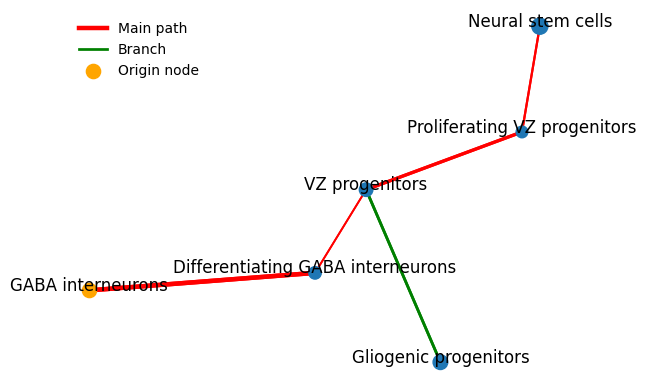


main path: ['GABA interneurons', 'Differentiating GABA interneurons', 'VZ progenitors', 'Proliferating VZ progenitors', 'Neural stem cells']


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 181 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 225 tasks      | elapsed:  

mean: -0.158 
median: 0.777 
lower quantile: -13.886 
upper quantile: 13.835 
minimum: -229.845 
maximum: 144.779 
No. of positive scores: 610

branch_1: ['VZ progenitors', 'Gliogenic progenitors']


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 181 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 225 tasks      | elapsed:  

mean: 1.756 
median: 2.185 
lower quantile: -7.673 
upper quantile: 11.993 
minimum: -121.556 
maximum: 89.613 
No. of positive scores: 680

'path_dict' added to adata.uns
'child_dict' added to adata.uns
'level_dict' added to adata.uns
'threshold_list' added to adata.uns
'd_nn' added to adata.obsp


Model training: 100%|██████████| 100/100 [06:58<00:00,  4.19s/it, cos_s=0.543, cos_u=0.507, mse_s=0.005, mse_u=0.005]


computing velocity graph (using 20/20 cores)


  0%|          | 0/13501 [00:00<?, ?cells/s]

    finished (0:00:28) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'velocity_tsne', embedded velocity vectors (adata.obsm)


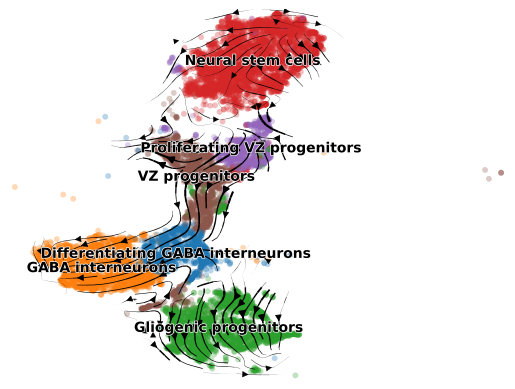

TIVelo:
 CBDir: 0.4097 ICVCoh: 0.5690 
 CBDir2: 0.2765 ICVCoh2: 0.6647 
 TransProbs: 0.3655 VeloCoh: 0.2234


In [4]:
adata_ = tivelo(adata, group_key, emb_key, data_name=data_name, save_folder=save_folder, njobs=-1, tree_gene=tree_gene,
                show_fig=show_fig, filter_genes=filter_genes, constrain=constrain, loss_fun=loss_fun, only_s=only_s,
                alpha_1=alpha_1, alpha_2=alpha_2, batch_size=batch_size, n_epochs=n_epochs, velocity_key="velocity",
                adjust_DTI=adjust_DTI, show_DTI=show_DTI, cluster_edges=cluster_edges,
                measure_performance=measure_performance)

## Run scVelo
Stochastic mode.

computing velocity embedding
    finished (0:00:01) --> added
    'velocity_tsne', embedded velocity vectors (adata.obsm)


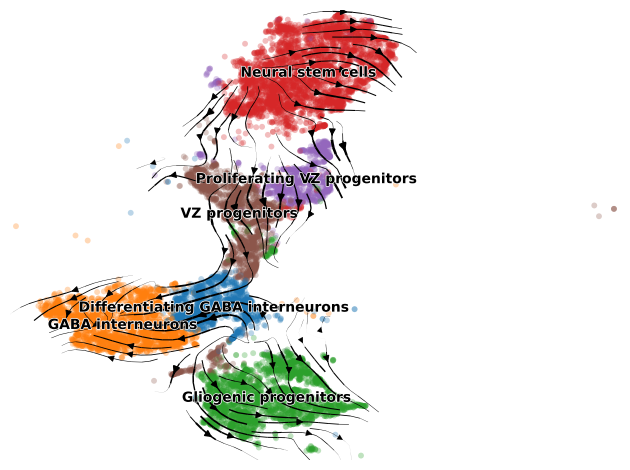

scvelo:
 CBDir: 0.3369 ICVCoh: 0.9165 
 CBDir2: 0.0170 ICVCoh2: 0.7131 
 TransProbs: 0.1030 VeloCoh: 0.0270


In [5]:
adata_scvelo = run_baseline(adata, "scvelo", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                            measure_performance=True)

Dynamical mode.

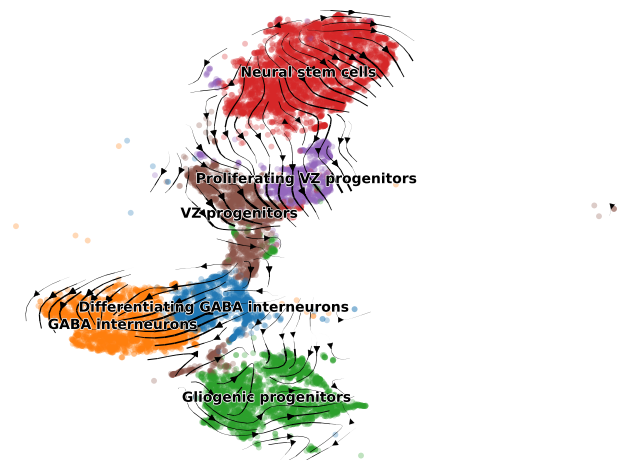

scvelo2:
 CBDir: 0.3264 ICVCoh: 0.8764 
 CBDir2: 0.0345 ICVCoh2: 0.5824 
 TransProbs: 0.2670 VeloCoh: -0.0166


In [6]:
adata_scvelo2 = run_baseline(adata, "scvelo2", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                            measure_performance=True)

## Run veloVI.

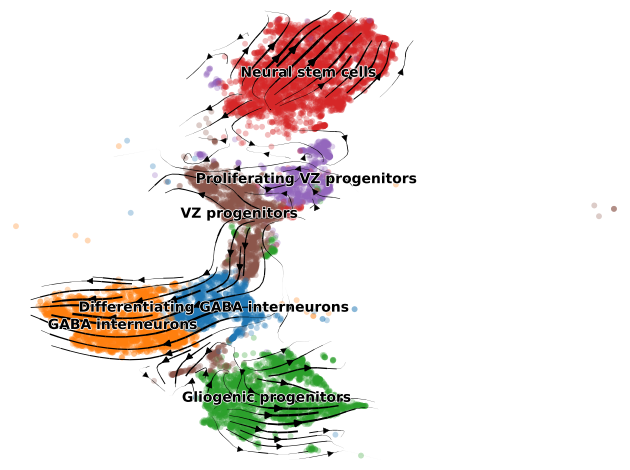

velovi:
 CBDir: 0.1836 ICVCoh: 0.9204 
 CBDir2: 0.0365 ICVCoh2: 0.7162 
 TransProbs: 0.0429 VeloCoh: 0.1380


In [7]:
adata_velovi = run_baseline(adata, "velovi", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                            measure_performance=True)

## Run UniTVelo.

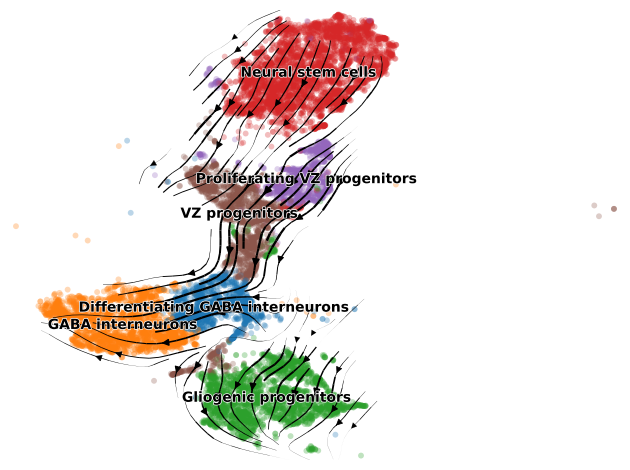

unitvelo:
 CBDir: 0.6024 ICVCoh: 0.9865 
 CBDir2: 0.0384 ICVCoh2: 0.8469 
 TransProbs: 0.1045 VeloCoh: 0.0565


In [8]:
adata_unitvelo = run_baseline(adata, "unitvelo", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                              measure_performance=True)

## Run cellDancer

We don't directly run cellDancer here since the environment required by cellDancer may conflict that of TIVelo. We recommend running cellDancer in an independent environment.

computing velocity graph (using 20/20 cores)


  0%|          | 0/13501 [00:00<?, ?cells/s]

    finished (0:00:05) --> added 
    'velocity_S_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'velocity_S_tsne', embedded velocity vectors (adata.obsm)


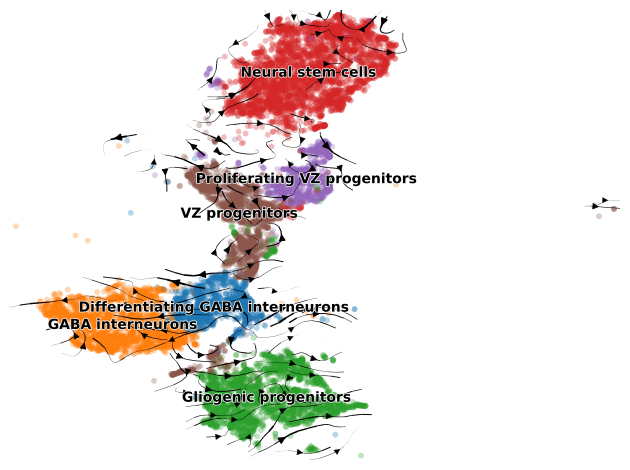

celldancer:
 CBDir: 0.0590 ICVCoh: 0.9774 
 CBDir2: 0.0900 ICVCoh2: 0.1915 
 TransProbs: 0.0037 VeloCoh: 0.0285


In [9]:
adata_celldancer = run_baseline(adata, "celldancer", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                                measure_performance=True)

## Run DeepVelo

We don't directly run DeepVelo here since the environment required by DeepVelo may conflict that of TIVelo. We recommend running DeepVelo in an independent environment.

In [3]:
adata_deepvelo = sc.read("/users/s1155184322/projects/tutorial/DeepVelo/results/hindbrain2_deepvelo.h5ad")
velocity_key = "velocity"

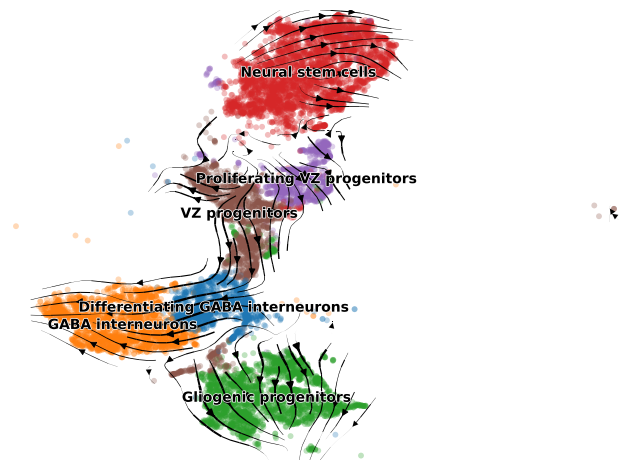

In [4]:
ax = scv.pl.velocity_embedding_stream(adata_deepvelo, vkey=velocity_key, color=group_key, title="", show=False)
plt.tight_layout()

In [4]:
from tivelo.utils.metrics import inner_cluster_coh, cross_boundary_correctness, cross_boundary_scvelo_probs, \
    cross_boundary_correctness2, inner_cluster_coh2, velo_coh
    
_, cbdir = cross_boundary_correctness(adata_deepvelo, cluster_key=group_key, velocity_key=velocity_key,
                                                  cluster_edges=cluster_edges, x_emb=emb_key)
_, cbdir2 = cross_boundary_correctness2(adata_deepvelo, cluster_key=group_key, velocity_key=velocity_key,
                                                    cluster_edges=cluster_edges)
_, trans_probs = cross_boundary_scvelo_probs(adata_deepvelo, cluster_key=group_key, cluster_edges=cluster_edges,
                                                         trans_g_key="{}_graph".format(velocity_key))
_, icvcoh = inner_cluster_coh(adata_deepvelo, cluster_key=group_key, velocity_key=velocity_key)
_, icvcoh2 = inner_cluster_coh2(adata_deepvelo, cluster_key=group_key, velocity_key=velocity_key, x_emb=emb_key)
velocoh = velo_coh(adata_deepvelo, velocity_key=velocity_key, trans_g_key="{}_graph".format(velocity_key))

print("DeepVelo:\n", "CBDir:", "%.4f" % cbdir, "ICVCoh:", "%.4f" % icvcoh, "\n",
      "CBDir2:", "%.4f" % cbdir2, "ICVCoh2:", "%.4f" % icvcoh2, "\n",
      "TransProbs:", "%.4f" % trans_probs, "VeloCoh:", "%.4f" % velocoh)

DeepVelo:
 CBDir: 0.3397 ICVCoh: 0.9316 
 CBDir2: -0.0108 ICVCoh2: 0.7514 
 TransProbs: 0.0399 VeloCoh: -0.1748
